# Problem Scoping

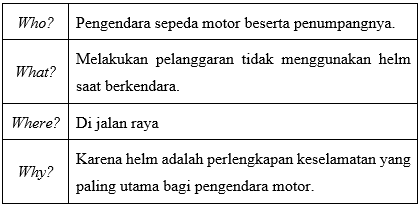

# Install YOLOV5

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 12076, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 12076 (delta 12), reused 12 (delta 3), pack-reused 12047
Receiving objects: 100% (12076/12076), 11.90 MiB | 32.75 MiB/s, done.
Resolving deltas: 100% (8368/8368), done.
/content/yolov5
     |████████████████████████████████| 596 kB 28.6 MB/s 


# Install Dependecies

In [ ]:
import torch
from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v6.1-230-gbf1a6dd Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/78.2 GB disk)


In [ ]:
%cd ..

/content


# Sambungkan ke Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Acquisition

In [ ]:
import shutil
import os, sys

zip_file = "drive/MyDrive/easy-helmet-detection.zip"

if os.path.isfile(zip_file):
  shutil.unpack_archive(zip_file, "data")
else:
  print(zip_file + " not found")

# Splitting Dataset

In [ ]:
import os, shutil, random

# preparing the folder structure

full_data_path = 'data/easy-helmet-detection/'
extension_allowed = '.jpg'
split_percentage = 90

images_path = 'data/images/'
if os.path.exists(images_path):
    shutil.rmtree(images_path)
os.mkdir(images_path)

labels_path = 'data/labels/'
if os.path.exists(labels_path):
    shutil.rmtree(labels_path)
os.mkdir(labels_path)

training_images_path = images_path + 'training/'
validation_images_path = images_path + 'validation/'
training_labels_path = labels_path + 'training/'
validation_labels_path = labels_path +'validation/'

os.mkdir(training_images_path)
os.mkdir(validation_images_path)
os.mkdir(training_labels_path)
os.mkdir(validation_labels_path)

files = []

ext_len = len(extension_allowed)

for r, d, f in os.walk(full_data_path):
    for file in f:
        if file.endswith(extension_allowed):
            strip = file[0:len(file) - ext_len]
            files.append(strip)

random.shuffle(files)

size = len(files)

split = int(split_percentage * size / 100)

print("copying training data")
for i in range(split):
    strip = files[i]

    image_file = strip + extension_allowed
    src_image = full_data_path + image_file
    shutil.copy(src_image, training_images_path)

    annotation_file = strip + '.txt'
    src_label = full_data_path + annotation_file
    shutil.copy(src_label, training_labels_path)

print("copying validation data")
for i in range(split, size):
    strip = files[i]

    image_file = strip + extension_allowed
    src_image = full_data_path + image_file
    shutil.copy(src_image, validation_images_path)

    annotation_file = strip + '.txt'
    src_label = full_data_path + annotation_file
    shutil.copy(src_label, validation_labels_path)

print("finished")

copying training data
copying validation data
finished


# Tampilkan Isi File Dataset

In [ ]:
#Jalur direktori data training easy detection helmet
training_easy_detection_helmet_dir = os.path.join('/content/data/images/training')

#Jalur direktori data validation easy detection helmet
validation_easy_detection_helmet_dir = os.path.join('/content/data/images/validation')

In [ ]:
#Menampilkan nama file data training
training_easy_detection_helmet_names_file = os.listdir(training_easy_detection_helmet_dir)
print(training_easy_detection_helmet_names_file[:10])

['993.jpg', '831.jpg', '1041.jpg', '1209.jpg', '8.jpg', '730.jpg', '52.jpg', '54.jpg', '147.jpg', '811.jpg']


In [ ]:
#Menampilkan nama file data validation
validation_easy_detection_helmet_names_files = os.listdir(validation_easy_detection_helmet_dir)
print(validation_easy_detection_helmet_names_files[:10])

['892.jpg', '765.jpg', '663.jpg', '10.jpg', '857.jpg', '932.jpg', '700.jpg', '996.jpg', '1133.jpg', '1039.jpg']


# Total Data Training dan Validation

In [ ]:
print('total data training easy detection helmet:', len(os.listdir(training_easy_detection_helmet_dir)))
print('total data validation easy detection helmet:', len(os.listdir(validation_easy_detection_helmet_dir)))

total data training easy detection helmet: 678
total data validation easy detection helmet: 76


# Data Exploration

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

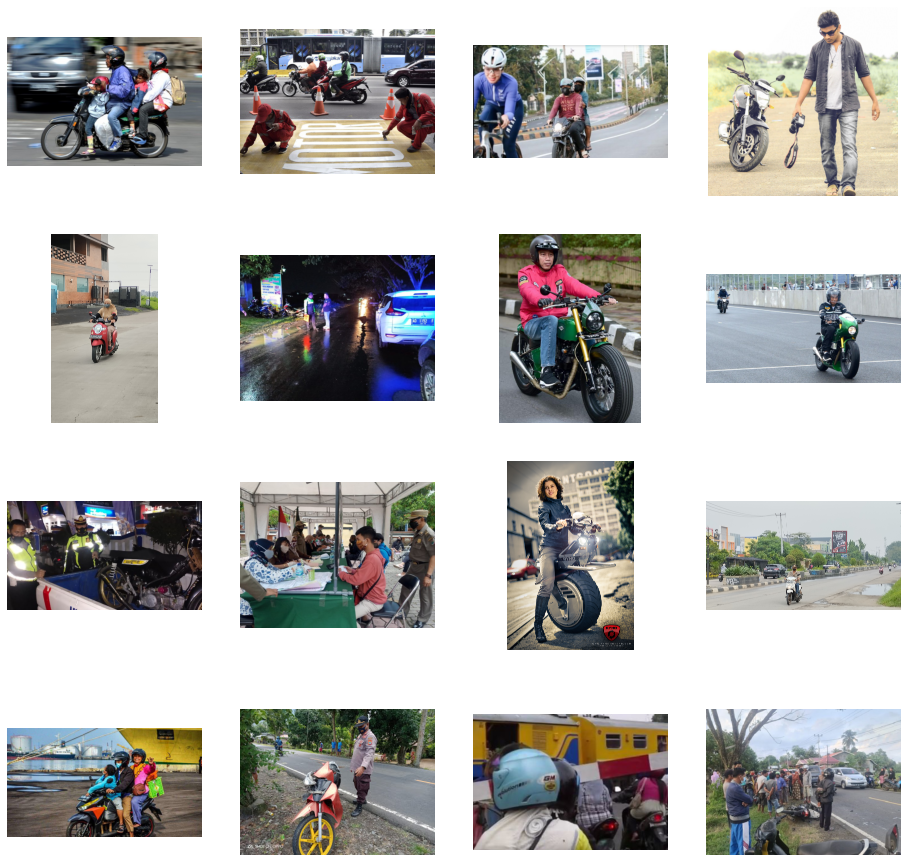

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_training_pic = [os.path.join(training_easy_detection_helmet_dir, fname)
                for fname in training_easy_detection_helmet_names_file[pic_index-8:pic_index]]
next_validation_pic = [os.path.join(validation_easy_detection_helmet_dir, fname)
                for fname in validation_easy_detection_helmet_names_files[pic_index-8:pic_index]]

for i, img_path in enumerate(next_training_pic + next_validation_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Buat File datset.yaml

In [ ]:
f = open("dataset.yaml", "a")

f.write("train: ../data/images/training/\n")
f.write("val: ../data/images/validation/\n")
f.write("nc: 2\n")
f.write("names: ['menggunakan helm', 'tidak menggunakan helm']\n")
f.close()

# Training Data

In [ ]:
%cd yolov5
!python train.py --img 640 --batch 16 --epochs 190 --data ../dataset.yaml --weights yolov5n.pt

/content/yolov5
train: weights=yolov5n.pt, cfg=, data=../dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=190, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-230-gbf1a6dd Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7

# Evaluate Model Performance

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)  # view results.png

# Data Test Menggunakan Gambar

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source ../Datatest1.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=../Datatest1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-186-g3356f26 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/Datatest1.jpg: 640x512 1 menggunakan helm, 3 tidak menggunakan helms, Done. (0.015s)
Speed: 0.5ms pre-process, 15.3ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


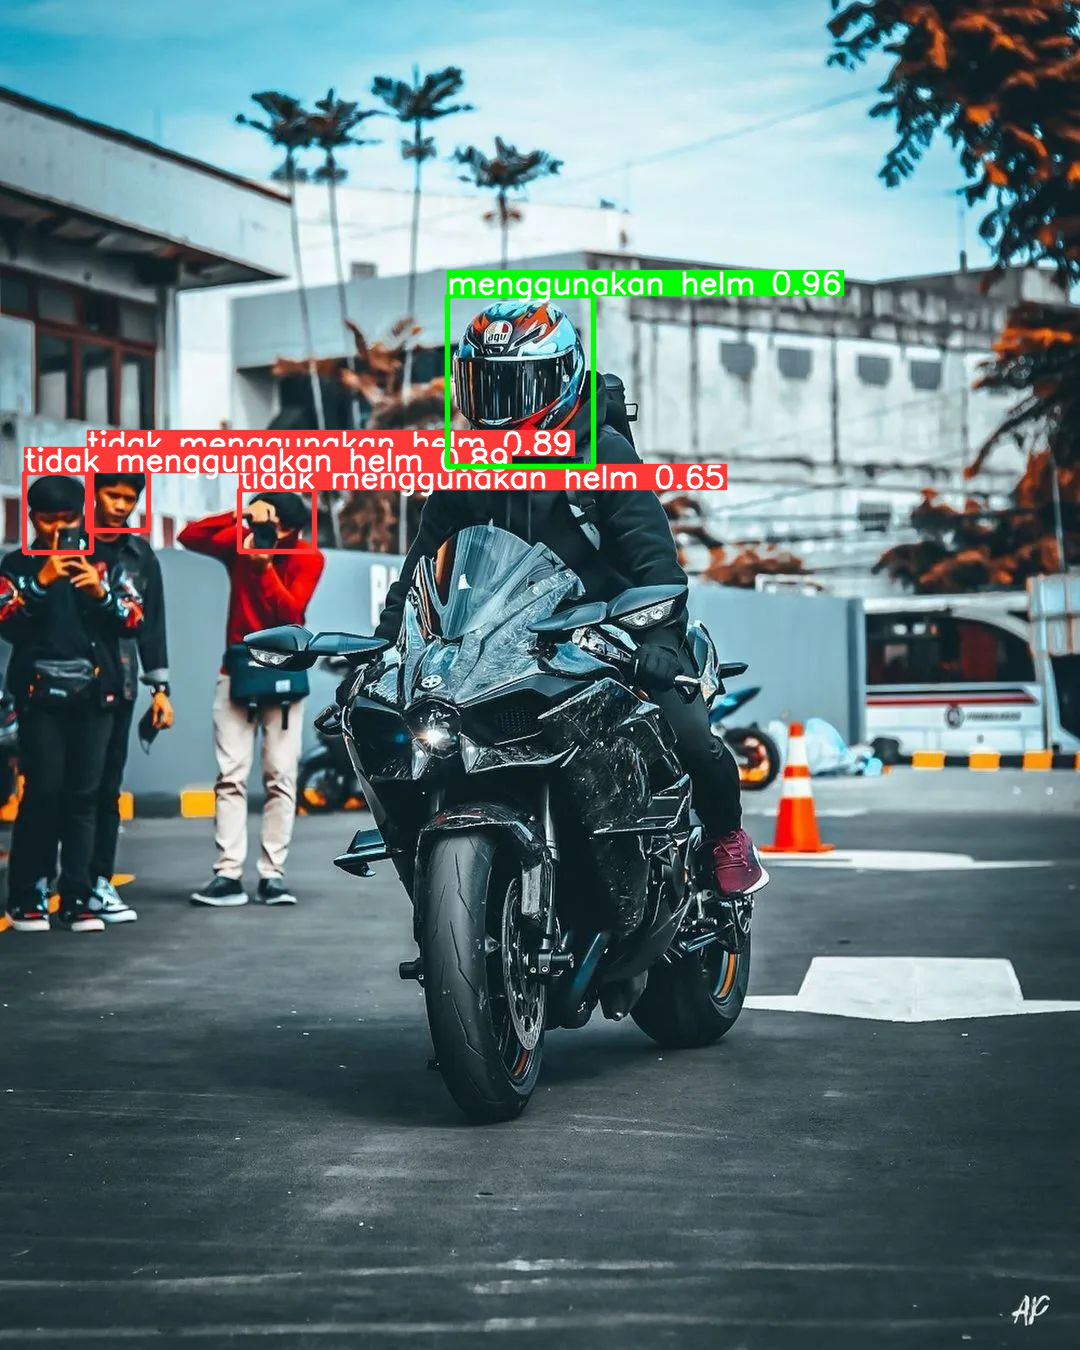

In [ ]:
from IPython.display import display
from PIL import Image

image_path = "runs/detect/exp/Datatest1.jpg"
display(Image.open(image_path))

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source ../Datatest2.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=../Datatest2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-186-g3356f26 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/Datatest2.jpg: 640x512 3 menggunakan helms, Done. (0.016s)
Speed: 0.5ms pre-process, 15.7ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


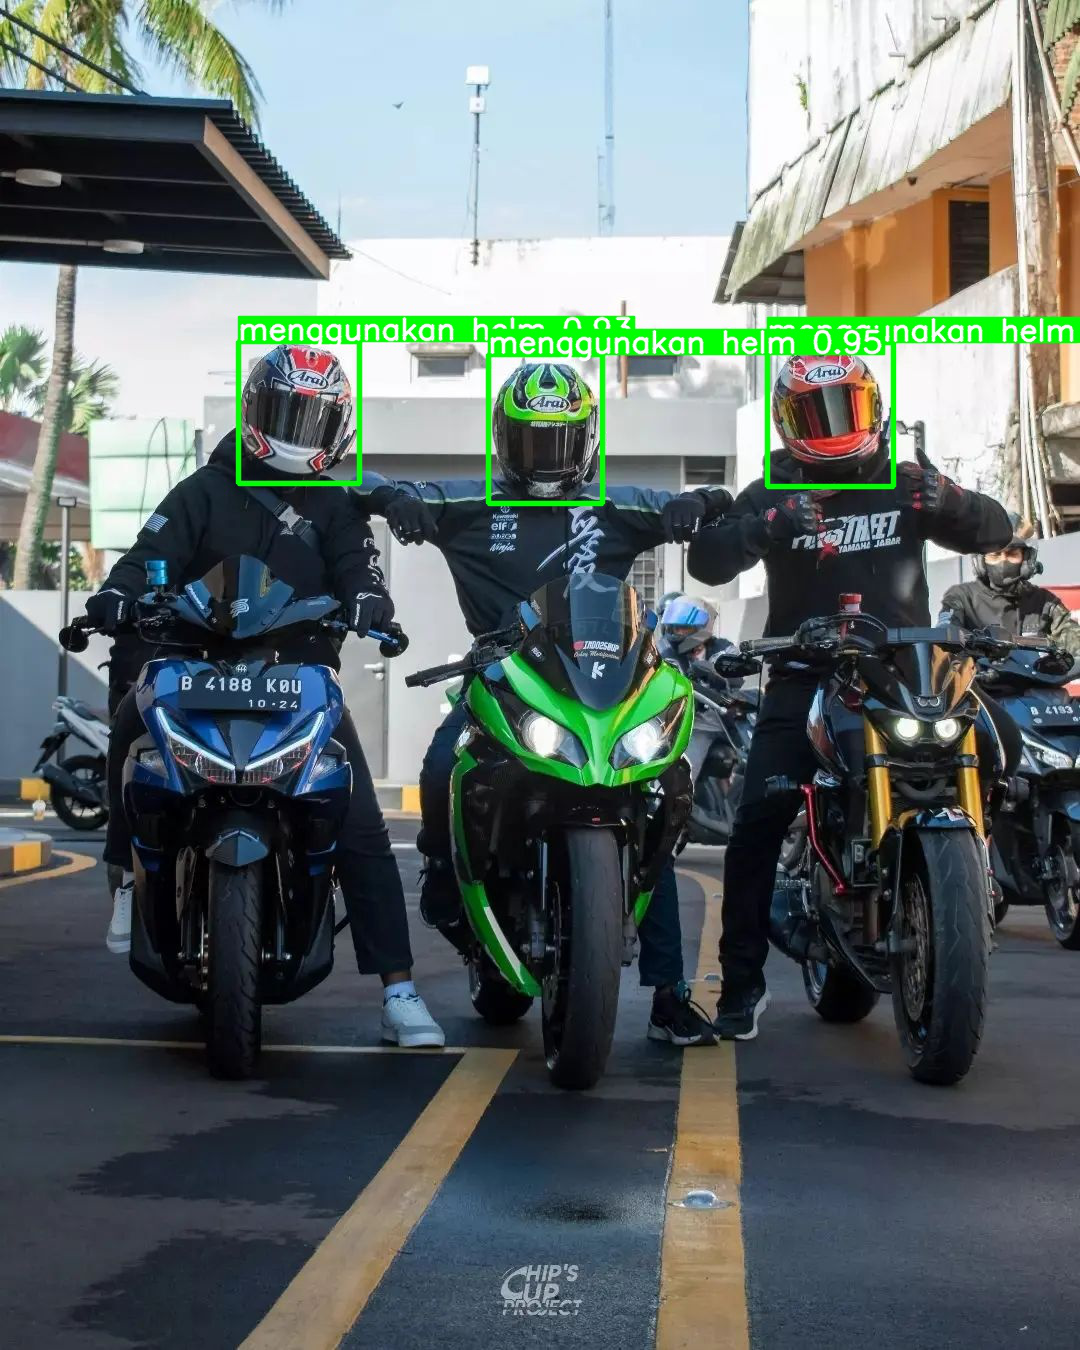

In [ ]:
from IPython.display import display
from PIL import Image

image_path = "runs/detect/exp2/Datatest2.jpg"
display(Image.open(image_path))

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source ../Datatest3.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=../Datatest3.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-186-g3356f26 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/Datatest3.jpg: 640x512 3 menggunakan helms, 2 tidak menggunakan helms, Done. (0.015s)
Speed: 0.5ms pre-process, 15.2ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


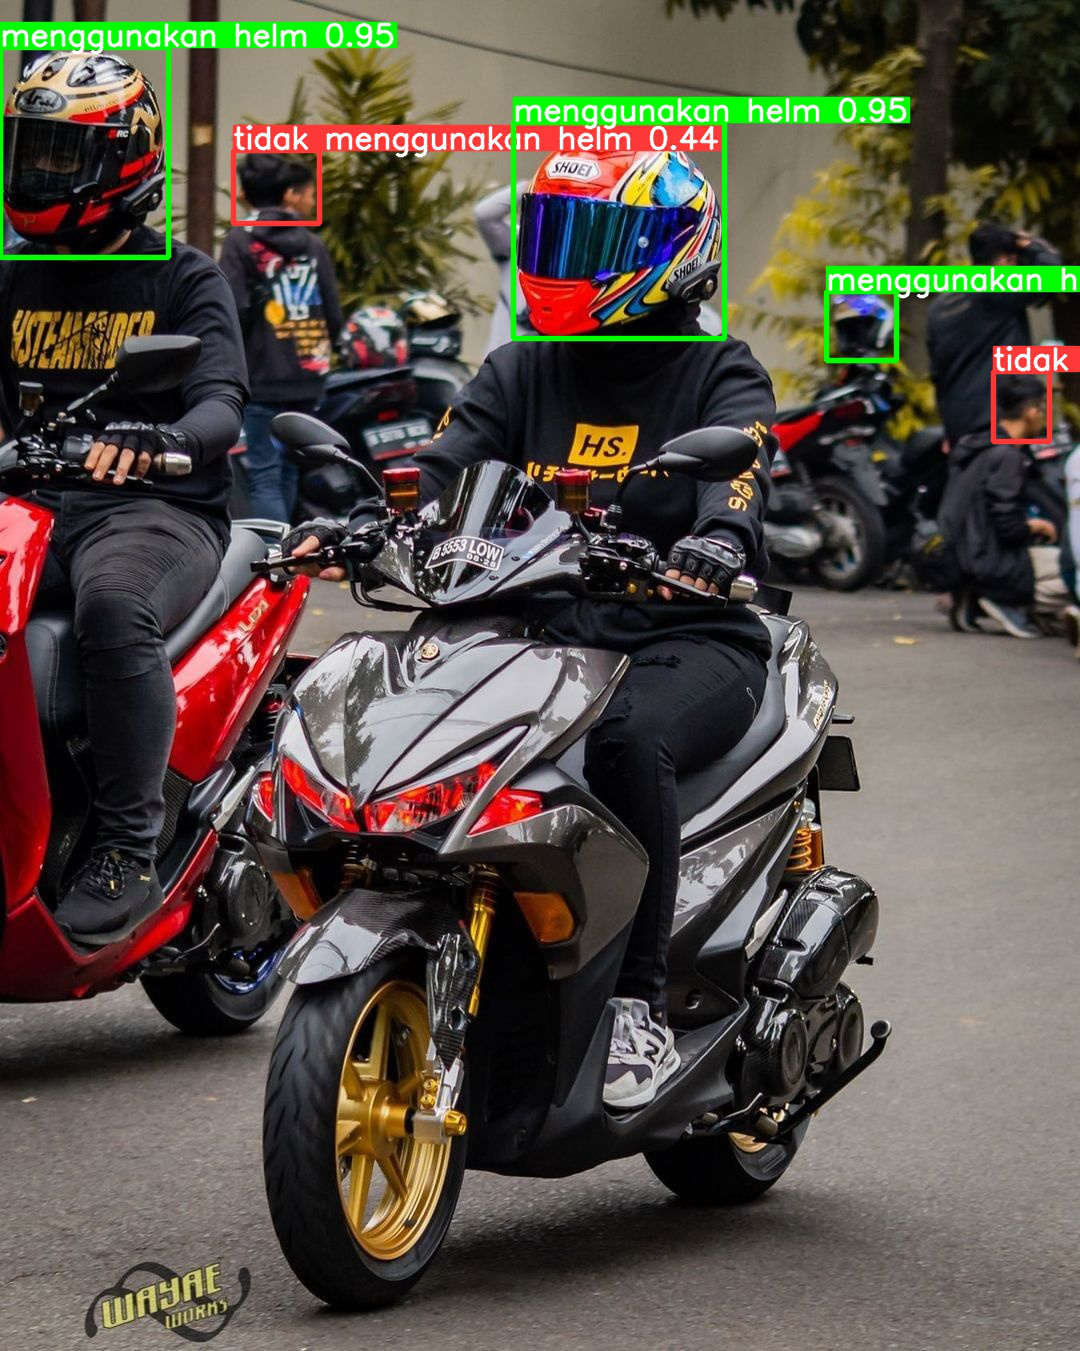

In [ ]:
from IPython.display import display
from PIL import Image

image_path = "runs/detect/exp3/Datatest3.jpg"
display(Image.open(image_path))

# Data Test Menggunakan Video

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source 'https://www.youtube.com/watch?v=ogLbruAGaj8'

Output streaming akan dipotong hingga 5000 baris terakhir.
0: 384x640 16 menggunakan helms, 7 tidak menggunakan helms, Done. (0.011s)
0: 384x640 16 menggunakan helms, 7 tidak menggunakan helms, Done. (0.011s)
0: 384x640 15 menggunakan helms, 6 tidak menggunakan helms, Done. (0.011s)
0: 384x640 15 menggunakan helms, 6 tidak menggunakan helms, Done. (0.011s)
0: 384x640 15 menggunakan helms, 6 tidak menggunakan helms, Done. (0.011s)
0: 384x640 15 menggunakan helms, 6 tidak menggunakan helms, Done. (0.012s)
0: 384x640 15 menggunakan helms, 6 tidak menggunakan helms, Done. (0.011s)
0: 384x640 15 menggunakan helms, 6 tidak menggunakan helms, Done. (0.011s)
0: 384x640 15 menggunakan helms, 6 tidak menggunakan helms, Done. (0.011s)
0: 384x640 12 menggunakan helms, 7 tidak menggunakan helms, Done. (0.011s)
0: 384x640 16 menggunakan helms, 7 tidak menggunakan helms, Done. (0.011s)
0: 384x640 12 menggunakan helms, 6 tidak menggunakan helms, Done. (0.012s)
0: 384x640 12 menggunakan helms, 6 tidak 

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source ../Datatest5.mp4

detect: weights=['runs/train/exp/weights/best.pt'], source=../Datatest5.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-186-g3356f26 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/536) /content/Datatest5.mp4: 384x640 Done. (0.017s)
video 1/1 (2/536) /content/Datatest5.mp4: 384x640 Done. (0.014s)
video 1/1 (3/536) /content/Datatest5.mp4: 384x640 2 tidak menggunakan helms, Done. (0.014s)
video 1/1 (4/536) /content/Datatest5.mp4: 384x640 1 tidak menggunakan helm, Done. (0.015s)
video 1/1 (5/536) /content/Datatest5.mp4: 384x640 D

In [ ]:
!python detect.py --weights best.pt --source 0  # webcam

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
python3: can't open file 'detect.py': [Errno 2] No such file or directory
